<h1>Project Description:</h1><br>
This project focuses on forecasting oil prices for a period of approximately 3 months (90 days) based on 32 years of historical data from 1987 to 2019. <br>
The models used are Facebook's FB prophet and ARIMA (Autoregressive Integrated Moving Average)<br>
Techniques such as cross validations have been used to evaluate the performance of the model <br>
Both the models are compared based on RMSE (Root Mean Squared Error)  <br>
Based on the results, we have concluded that ARIMA gives us a better forecasting performance.


<h1>Import Statements





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation


<h1>Importing the dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Sidharth37/Brent-Oil-Price-Forecasting/main/BrentOilPrices.csv")
df.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [ ]:
df.tail()

,Date,Price
8211,"Sep 24, 2019",64.13
8212,"Sep 25, 2019",62.41
8213,"Sep 26, 2019",62.08
8214,"Sep 27, 2019",62.48
8215,"Sep 30, 2019",60.99


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8216 non-null   object 
 1   Price   8216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [ ]:
df.describe()

,Price
count,8216.000000
mean,46.332605
std,32.704113
min,9.100000
25%,18.730000
50%,31.260000
75%,67.432500
max,143.950000


<h1>Part 1 - FB Prophet 

<h2>Data Preprocessing

Converting date format to a standard format, both the Arima model and the FB Prphet require the date field in a particular date time series format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Visualizing trends over the years

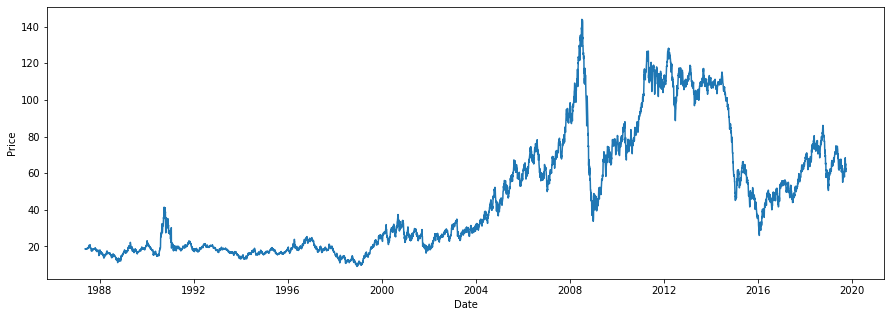

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Date'],y=df['Price'])
plt.show()

There is a visible upward trend in the later years of 2002 and beyond.<br>
There is a sharp downfall around 2008-2009,which was directly preceded by an spike(all time high).<br> The great recession could be one of the reasons contributing to this, the oil prices recovered rather quickly by 2010.

<h2>Forecast Model using Prophet

List of all available functions with Prophet library

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

Instantiating the model

In [ ]:
model=Prophet()

Transforming column names according to Prophet requirements.<br>
The date field compulsarily needs to be names 'ds' and should be in a date/date-time format.<br> The target field compulsarily needs to be named 'y'

In [ ]:
df=df.rename(columns={'Date':'ds','Price':'y'})
df.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<h2>Model fitting and prediction

In [ ]:
model.fit(df)
#Adding 90 days to the existing dates in the 'df' dataframe
future=model.make_future_dataframe(periods=90)
forecast=model.predict(future)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

<b>Based on the comment above and output of the model.component we can see that daily seasonily doesnot play a huge part, yearly and weekly seasonality contribute towards the trends

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8301,2019-12-25,39.764728,25.267666,54.484276
8302,2019-12-26,39.915279,22.921159,55.691692
8303,2019-12-27,39.820882,24.752658,54.988813
8304,2019-12-28,41.286351,26.107177,56.277088
8305,2019-12-29,41.294429,26.800319,56.590800


**yhat** - The actual prediction/projection<br>
**yhatlower & yhat_upper** - The upper and lower limits for the yhat at each date value

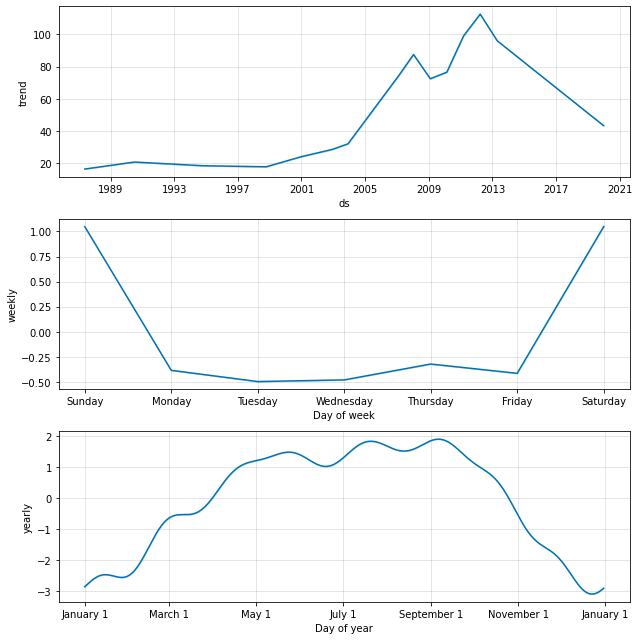

In [ ]:
fig1=model.plot_components(forecast)

Description for the above 3 plots -<br>
**Trend** - The actual trend based on the projections drawn by the model<br>
**Weekly seasonaily** - The additive effects on y (prices) based on the days of the week<br>
**Yearly seasonality** - The additive effects on y (prices) based on the ,onths od the year

<b>The prices generally seem to spike up around the weekends.
Also the prices are lower during the holiday period - colder months(Nov-Jan)

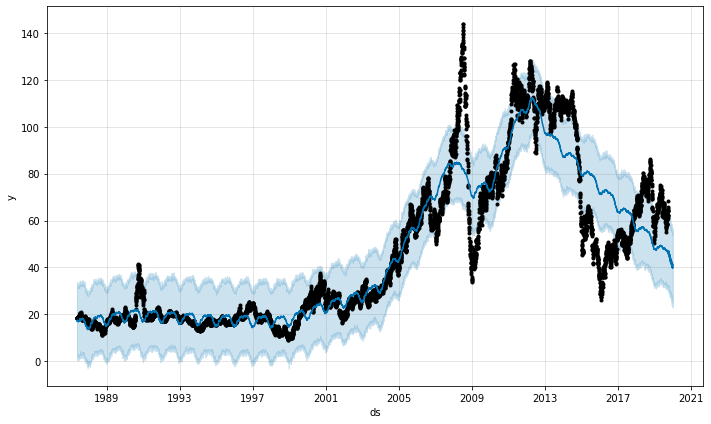

In [ ]:
fig2=model.plot(forecast)

In the plots above,<br> 
the black line is the actual data we have, 
the dark blue line is the projection, <br>
the light blue line is the confidence band

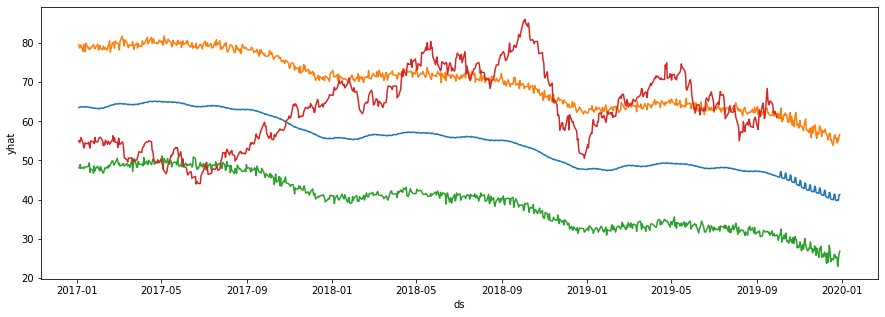

In [ ]:
temp=forecast[forecast['ds']>'2017-01-01']
temp1=df[df['ds']>'2017-01-01']
plt.figure(figsize=(15,5))
sns.lineplot(x=temp['ds'], y=temp['yhat'])
sns.lineplot(x=temp['ds'], y=temp['yhat_upper'])
sns.lineplot(x=temp['ds'], y=temp['yhat_lower'])
sns.lineplot(x=temp1['ds'], y=temp1['y'])


**Red**- actual values<br>
**Orange** - yhat_upper<br>
**Blue** - yhat<br>
**Green** - yhat_lower<br>

Based on the predicted trends, the oil prices seem to show a downward trend for the 90 days period.

<h2>Cross Validation

Our main aim is to see how well is our model performing

In [ ]:
df_cv = cross_validation(model,horizon='90 days')

INFO:fbprophet:Making 253 forecasts with cutoffs between 1988-06-14 00:00:00 and 2019-07-02 00:00:00


In [38]:
df_p=performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,282.403641,16.804870,10.486001,0.222718,0.139140,0.428210
1,10 days,286.860930,16.936969,10.579680,0.225149,0.139140,0.428386
2,11 days,286.084948,16.914046,10.579184,0.225121,0.139254,0.425301
3,12 days,289.497857,17.014637,10.654173,0.226923,0.141088,0.425282
4,13 days,294.809442,17.170016,10.740091,0.229876,0.141327,0.426502
...,...,...,...,...,...,...,...
77,86 days,384.392174,19.605922,12.765919,0.292912,0.186938,0.357143
78,87 days,379.854502,19.489856,12.716278,0.291679,0.185460,0.355474
79,88 days,377.302682,19.424281,12.690893,0.289387,0.184892,0.357121
80,89 days,383.283203,19.577620,12.785696,0.290499,0.185352,0.352489


We get similar metrics pertaining to errors from the performance_metric function. For our use we will opt the RMSE(Root mean square error).<br>
Based on the results we can say that RMSE fluctuates between 16.8 to 19.6.<br> This makes sense with the fact that as we try to predict further into the future the accuracy goes down, leading to a higher RMSE 

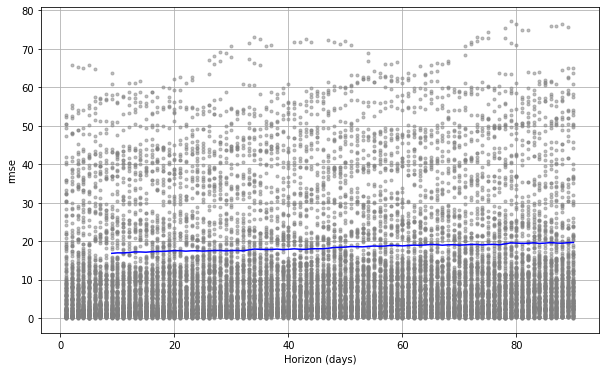

In [39]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

The above graph shows us the average RMSE over the 253 (90 day) periods that our model forecasts during crossvalidation

<h1> Part 2 - ARIMA (Autoregressive Integrated Moving Average)

<h2> Data Preprocessing

In [87]:
df

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8211,2019-09-24,64.13
8212,2019-09-25,62.41
8213,2019-09-26,62.08
8214,2019-09-27,62.48


In [101]:
arima_df=df
arima_df.index=arima_df['ds']
arima_df=arima_df.iloc[:,1]
arima_df=pd.DataFrame(arima_df)
arima_df

,y
ds,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


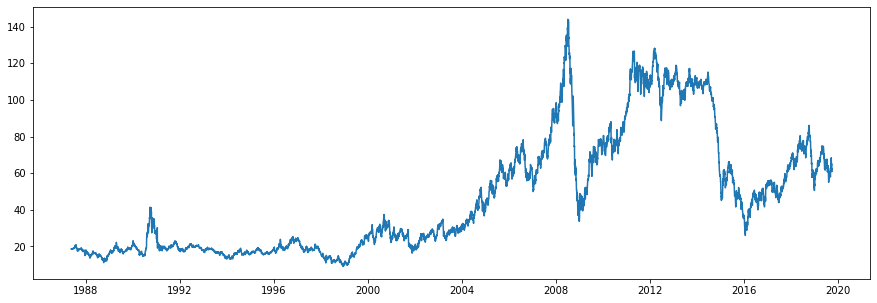

In [102]:
plt.figure(figsize=(15,5))
plt.plot(arima_df)

Based on the plot above, there seems to be an obvious trend in the time series, indicating a non-stationary series. <br>
To make the series stationary, we will use the difference method.

In [103]:
arima_dif=arima_df.diff(periods=1)

In [104]:
arima_dif=arima_dif[1:]

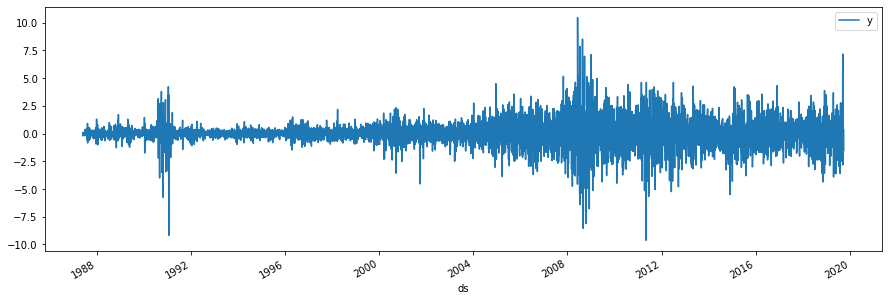

In [105]:
arima_dif.plot(figsize=(15,5))

Based on the differenced plot, we can see that we have taken care of the trend. <br> To check if the series is stationary, we use the AD Fuller test.

In [106]:
from statsmodels.tsa.stattools import adfuller   

In [107]:
dftest = adfuller(arima_dif['y'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -1.332758e+01
p-value                        6.276497e-25
#Lags Used                     3.400000e+01
Number of Observations Used    8.180000e+03
Critical Value (1%)           -3.431150e+00
Critical Value (5%)           -2.861893e+00
Critical Value (10%)          -2.566958e+00
dtype: float64


Based on the p-value of AD Fuller test, we can reject the null hypothesis (series is non stationary) and infer that the series is stationary.

In [108]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

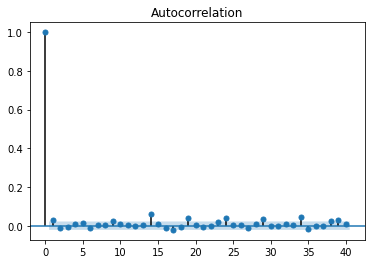

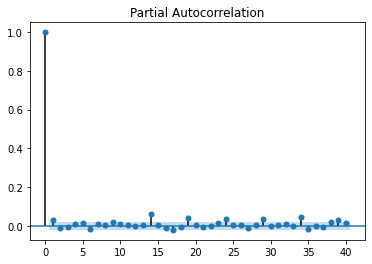

In [109]:
fig1=plot_acf(arima_dif)
fig2=plot_pacf(arima_dif)

Based on the above plots, we can infer the values of p=1 (No. of Autoregresssive lags) and q=1 (No. of Moving Average lags)<br>
<h2> Making a train test split

In [110]:
train=arima_df[0:7001]
test=arima_df[7000:]

In [111]:
train

,y
ds,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2014-12-17,59.84
2014-12-18,58.81
2014-12-19,58.87


In [112]:
test

,y
ds,
2014-12-23,59.07
2014-12-24,58.67
2014-12-26,58.72
2014-12-29,57.86
2014-12-30,55.60
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [113]:
from statsmodels.tsa.arima_model import ARIMA

In [114]:
arima_model=ARIMA(train['y'],order=(1,1,1))
arima_model_fit=arima_model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [115]:
forecast=arima_model_fit.forecast(steps=1216)[0]

In [116]:
forecast

array([59.10233554, 59.10627892, 59.11218559, ..., 66.11138995,
       66.11716964, 66.12294934])

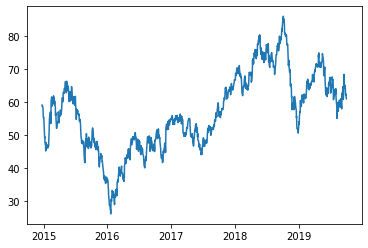

In [117]:
plt.plot(test['y'])

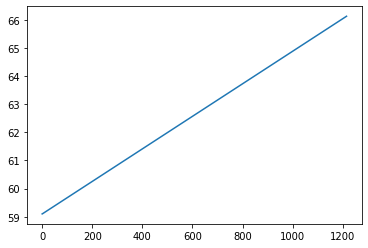

In [118]:
plt.plot(forecast)

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [120]:
rms=sqrt(mean_squared_error(test['y'],forecast))

In [121]:
rms

12.058859732881876

Based on the RMSE value, we can say that the error percentage for the ARIMA model is lower than that of FB Prophet model

In [122]:
arima_model=ARIMA(arima_df,order=(1,1,1))
arima_model_fit=arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<h2> Forecasting for the 90 day period


In [123]:
forecast=arima_model_fit.forecast(steps=90)[0]


In [124]:
arima_df.tail()

,y
ds,
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08
2019-09-27,62.48
2019-09-30,60.99


In [125]:
x=pd.DataFrame(pd.date_range(start='2019-10-01', periods=90))
x['y']=forecast
x=x.rename(columns={0:'ds'})
x.index=x['ds']

In [126]:
x.drop(['ds'],axis=1,inplace=True)

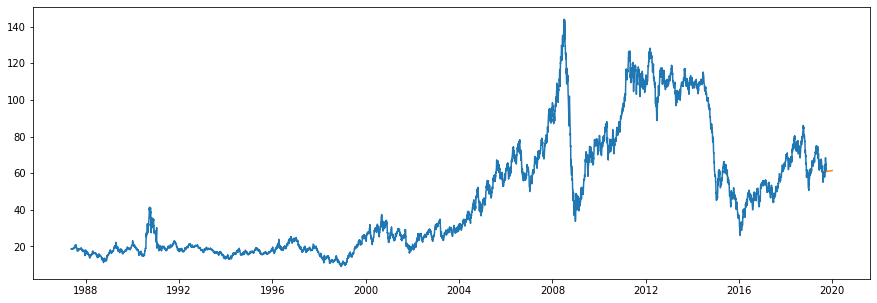

In [127]:
plt.figure(figsize=(15,5))
plt.plot(arima_df)
plt.plot(x)